In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

64.35388995931788 -53.5195445462023
23.474281966315203 153.40979494534008
-22.733336034930772 127.76972470656722
28.816398055791453 98.25303245321129
49.71615176694638 -0.8823434391361502
48.70487355561684 -171.50020465536156
-23.055199679653327 -13.67293537290638
45.255108355679795 108.96130313425454
-19.432334103987642 -119.48674884174005
-42.81934055180444 76.69031624554395
-81.08185696336325 -90.0453604647043
-24.237710618060404 114.6679059316321
-66.16458358070638 10.484651160550925
-67.7596851920091 -18.691271335016438
30.15648071979203 144.5919538146327
72.97646288755072 109.1527429687469
22.07076493601447 -101.95663366231932
35.15690116118607 -90.00643520483952
-21.527424207082746 -8.006814924007557
10.574164879396804 -103.09495188827321
-73.69435334291651 96.46984870531236
-0.8730476299103458 -29.779162825297078
76.07914425197566 51.406450905415994
51.879171036589895 -72.33248189003696
-20.392365106782606 -23.763725507314717
15.946000282326054 -167.1551819195291
19.45952022394

In [18]:
from citipy import citipy 

In [19]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


629

In [ ]:
# API key from Open Weather website 

In [20]:
import requests
requests.__version__


'2.28.1'

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1fa33cf8c752186e1af89c93941ffc5


In [24]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
                                                                              
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maniitsoq
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | yulara
Processing Record 4 of Set 1 | tezu
Processing Record 5 of Set 1 | bayeux
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | darhan
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | villa juarez
Processing Record 17 of Set 1 | memphis
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | albanel
Processing Record 23 of 

Processing Record 38 of Set 4 | caorle
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | ahuimanu
Processing Record 41 of Set 4 | kologriv
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | camopi
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | san pedro
Processing Record 49 of Set 4 | buraydah
Processing Record 50 of Set 4 | rundu
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | grindavik
Processing Record 3 of Set 5 | ahipara
Processing Record 4 of Set 5 | necochea
Processing Record 5 of Set 5 | bargteheide
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | mattru
Processing Record 8 of Set 5 | halmstad
Processing Record 9 of Set 5 | tokur
Processing Record 10 of Set 5 | tabou
Processing Record 11 of Set 5 | paamiut
Processin

Processing Record 30 of Set 8 | tawang
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | caluquembe
Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | buzmeyin
Processing Record 35 of Set 8 | menongue
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | zhaodong
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | kamina
Processing Record 41 of Set 8 | hay river
Processing Record 42 of Set 8 | daru
Processing Record 43 of Set 8 | matam
Processing Record 44 of Set 8 | tuatapere
Processing Record 45 of Set 8 | andenes
Processing Record 46 of Set 8 | pasighat
Processing Record 47 of Set 8 | bonavista
Processing Record 48 of Set 8 | husavik
Processing Record 49 of Set 8 | polunochnoye
Processing Record 50 of Set 8 | simpang
Processing Record 1 of Set 9 | sibi
Processing Record 2 of Set 9 | saleaula
City not found. Skipping...
Processing Record 3 o

Processing Record 20 of Set 12 | tecoanapa
Processing Record 21 of Set 12 | andrelandia
Processing Record 22 of Set 12 | campbellton
Processing Record 23 of Set 12 | pamplona
Processing Record 24 of Set 12 | puerto escondido
Processing Record 25 of Set 12 | nara
Processing Record 26 of Set 12 | ornskoldsvik
Processing Record 27 of Set 12 | scottsbluff
Processing Record 28 of Set 12 | saeby
Processing Record 29 of Set 12 | moron
Processing Record 30 of Set 12 | qandala
Processing Record 31 of Set 12 | wanning
Processing Record 32 of Set 12 | grand centre
City not found. Skipping...
Processing Record 33 of Set 12 | sokoni
Processing Record 34 of Set 12 | bridlington
Processing Record 35 of Set 12 | kloulklubed
Processing Record 36 of Set 12 | kyaikto
Processing Record 37 of Set 12 | ceyhan
Processing Record 38 of Set 12 | bela
Processing Record 39 of Set 12 | malakal
Processing Record 40 of Set 12 | mweka
Processing Record 41 of Set 12 | chapais
Processing Record 42 of Set 12 | pucallpa


In [25]:
len(city_data)

587

In [26]:
# 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maniitsoq,65.4167,-52.9000,41.23,85,80,8.55,GL,2022-07-17 04:24:01
1,Katsuura,35.1333,140.3000,75.22,83,52,16.04,JP,2022-07-17 04:31:57
2,Yulara,-25.2406,130.9889,68.99,12,1,6.46,AU,2022-07-17 04:25:07
3,Tezu,27.9167,96.1667,86.72,90,72,3.60,IN,2022-07-17 04:31:57
4,Bayeux,-7.1250,-34.9322,74.03,94,75,10.36,BR,2022-07-17 04:31:57
5,Bethel,41.3712,-73.4140,71.96,89,0,0.00,US,2022-07-17 04:31:58
6,Jamestown,42.0970,-79.2353,64.02,78,65,4.23,US,2022-07-17 04:31:12
7,Darhan,49.4867,105.9228,77.88,40,2,7.76,MN,2022-07-17 04:31:58
8,Rikitea,-23.1203,-134.9692,73.80,73,100,16.73,PF,2022-07-17 04:31:59
9,Mahebourg,-20.4081,57.7000,72.25,73,40,13.80,MU,2022-07-17 04:31:59


In [27]:
# Reorder the columns
city_data_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maniitsoq,GL,2022-07-17 04:24:01,65.4167,-52.9000,41.23,85,80,8.55
1,Katsuura,JP,2022-07-17 04:31:57,35.1333,140.3000,75.22,83,52,16.04
2,Yulara,AU,2022-07-17 04:25:07,-25.2406,130.9889,68.99,12,1,6.46
3,Tezu,IN,2022-07-17 04:31:57,27.9167,96.1667,86.72,90,72,3.60
4,Bayeux,BR,2022-07-17 04:31:57,-7.1250,-34.9322,74.03,94,75,10.36
...,...,...,...,...,...,...,...,...,...
582,Kaka,TM,2022-07-17 04:47:07,37.3482,59.6143,97.25,8,0,8.39
583,Anqing,CN,2022-07-17 04:47:07,30.5092,117.0506,90.99,60,100,11.18
584,Vanavara,RU,2022-07-17 04:47:08,60.3400,102.2797,69.71,43,92,4.47
585,College,US,2022-07-17 04:47:08,64.8569,-147.8028,68.32,70,75,4.61


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658033311.341706

In [31]:
today = time.strftime("%x")
today

'07/16/22'

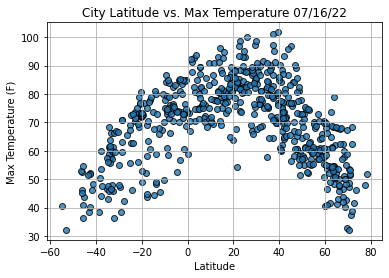

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

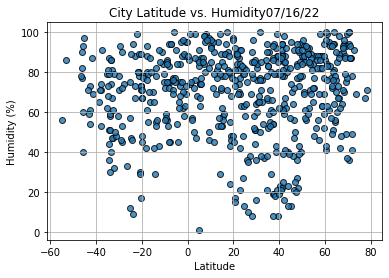

In [38]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


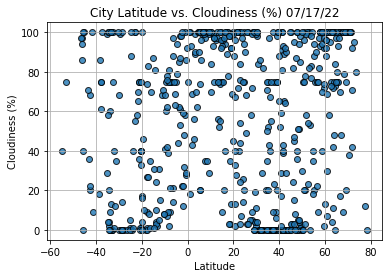

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

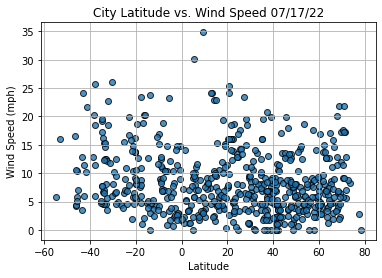

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()